<a href="https://colab.research.google.com/github/sarajay19/RoadDamageDetection/blob/main/PotholeRoadDamage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Overview

Potholes pose a major challenge to road infrastructure resulting in vehicle damage and accidents. There is an urgent need for an automated solution that can accurately identify and segment potholes in real-time.

To address the problem we implemented the **YOLO8** object detection algorithm for real-time segmentation of potholes.

# Dataset Description

Dataset Name: **Pothole Detection for Road Safety: A Segmentation Dataset**

This dataset was sourced via roboflow.com and contains a total of 780 images annotated in the YOLOv8 format for pothole detection and segmentation. The images have undergone pre-processing and augmentation to ensure they are primed for training robust models.

# Import Libraries

In [ ]:
!pip install -q ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.8/41.8 kB 1.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 872.1/872.1 kB 8.5 MB/s eta 0:00:00


In [ ]:
! pip install tensorflow

In [ ]:
!pip install squarify

In [ ]:
# Importing the required libraries
from ultralytics import YOLO
import squarify
import matplotlib.pyplot as plt
import cv2
import os
import random
import pandas as pd
import matplotlib.image as mpimg
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

sns.set_style('darkgrid')

%matplotlib inline

import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)

# Read The Dataset

In [ ]:
#!kaggle datasets download -d hasibullahaman/objectdetectioncar
!kaggle datasets download -d farzadnekouei/pothole-image-segmentation-dataset

Dataset URL: https://www.kaggle.com/datasets/farzadnekouei/pothole-image-segmentation-dataset
License(s): apache-2.0
 91% 54.0M/59.3M [00:02<00:00, 36.4MB/s]
100% 59.3M/59.3M [00:02<00:00, 29.0MB/s]


In [ ]:
#!unzip objectdetectioncar.zip
!unzip pothole-image-segmentation-dataset

Archive:  pothole-image-segmentation-dataset.zip
  inflating: Pothole_Segmentation_YOLOv8/README.dataset.txt  
  inflating: Pothole_Segmentation_YOLOv8/README.roboflow.txt  
  inflating: Pothole_Segmentation_YOLOv8/data.yaml  
  inflating: Pothole_Segmentation_YOLOv8/sample_video.mp4  
  inflating: Pothole_Segmentation_YOLOv8/train/images/pic-1-_jpg.rf.49882cdb272111f43a6656b1494a4918.jpg  
  inflating: Pothole_Segmentation_YOLOv8/train/images/pic-1-_jpg.rf.8d95dd1d29760a2634a45cc7fdd84b31.jpg  
  inflating: Pothole_Segmentation_YOLOv8/train/images/pic-1-_jpg.rf.e238c9bf3fe82e8ac55b0014a27fc529.jpg  
  inflating: Pothole_Segmentation_YOLOv8/train/images/pic-10-_jpg.rf.1d433d21e11d000b6b498eacb88fe4a9.jpg  
  inflating: Pothole_Segmentation_YOLOv8/train/images/pic-10-_jpg.rf.500c683a687e403f4cdade4826a84b5b.jpg  
  inflating: Pothole_Segmentation_YOLOv8/train/images/pic-10-_jpg.rf.5a901c212d899a7dc7dc78be7de892c0.jpg  
  inflating: Pothole_Segmentation_YOLOv8/train/images/pic-100-_jpg.r

# Define the path of splitting Data

In [ ]:
# Define the paths to the images and labels directories
train_images = "/content/Pothole_Segmentation_YOLOv8/train/images"
train_labels = "/content/Pothole_Segmentation_YOLOv8/train/labels"

'''
test_images = "/content/Update820/test/images"
test_labels = "/content/Update820/test/labels"
'''

val_images = "/content/Pothole_Segmentation_YOLOv8/valid/images"
val_labels = "/content/Pothole_Segmentation_YOLOv8/valid/labels"

# Draw the Bounding Box over the imaages

In [ ]:
# Get a list of all the image files in the training images directory
image_files = os.listdir(train_images)

# Choose 16 random image files from the list
random_images = random.sample(image_files, 16)

# Set up the plot
fig, axs = plt.subplots(4, 4, figsize=(16, 16))

# Loop over the random images and plot the object detections
for i, image_file in enumerate(random_images):
    row = i // 4
    col = i % 4

    # Load the image
    image_path = os.path.join(train_images, image_file)
    image = cv2.imread(image_path)

    # Load the labels for this image
    label_file = os.path.splitext(image_file)[0] + ".txt"
    label_path = os.path.join(train_labels, label_file)
    with open(label_path, "r") as f:
        labels = f.read().strip().split("\n")

    # Loop over the labels and plot the object detections
    # Loop over the labels and plot the object detections
    for label in labels:
        if len(label.split()) != 5:
            continue
        class_id, x_center, y_center, width, height = map(float, label.split())
        x_min = int((x_center - width/2) * image.shape[1])
        y_min = int((y_center - height/2) * image.shape[0])
        x_max = int((x_center + width/2) * image.shape[1])
        y_max = int((y_center + height/2) * image.shape[0])
        cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (0, 255, 0), 3)


    # Show the image with the object detections
    axs[row, col].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    axs[row, col].axis('off')

plt.show()

# Load a single image with OpenCV

In [ ]:
# Load an image using OpenCV
image = cv2.imread("/content/Pothole_Segmentation_YOLOv8/train/images/pic-1-_jpg.rf.49882cdb272111f43a6656b1494a4918.jpg")
image = cv2.resize(image, (512, 512))
if image is None:
    print(f"Failed to load image at path: {image_path}")
else:
    height, width, channels = image.shape
    print(f"The image has dimensions {width}x{height} and {channels} channels.")


The image has dimensions 512x512 and 3 channels.


# Model Training

We use a **pre-trained model** for real-time pothole segmentation using **YOLO** version 8.

In [ ]:
# Loading a pretrained model
model = YOLO('yolov8x.pt')

# Training the model
model.train(data = '/content/Pothole_Segmentation_YOLOv8/data.yaml',
            epochs = 30,
            imgsz = height,
            seed = 42,
            batch = 8,
            workers = 4)

100%|██████████| 131M/131M [00:00<00:00, 265MB/s]


Ultralytics YOLOv8.2.87 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8x.pt, data=/content/Pothole_Segmentation_YOLOv8/data.yaml, epochs=30, time=None, patience=100, batch=8, imgsz=512, save=True, save_period=-1, cache=False, device=None, workers=4, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=42, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, s

100%|██████████| 755k/755k [00:00<00:00, 44.3MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1      2320  ultralytics.nn.modules.conv.Conv             [3, 80, 3, 2]                 
  1                  -1  1    115520  ultralytics.nn.modules.conv.Conv             [80, 160, 3, 2]               
  2                  -1  3    436800  ultralytics.nn.modules.block.C2f             [160, 160, 3, True]           
  3                  -1  1    461440  ultralytics.nn.modules.conv.Conv             [160, 320, 3, 2]              
  4                  -1  6   3281920  ultralytics.nn.modules.block.C2f             [320, 320, 6, True]           
  5                  -1  1   1844480  ultralytics.nn.modules.conv.Conv             [320, 640, 3, 2]              
  6                  -1  6  13117440  ultralytics.nn.modules.block.C2f             [640, 640, 6, True]           
  7                  -1  1   3687680  ultralytics

100%|██████████| 6.25M/6.25M [00:00<00:00, 205MB/s]


AMP: checks passed ✅


train: Scanning /content/Pothole_Segmentation_YOLOv8/train/labels... 720 images, 0 backgrounds, 0 corrupt: 100%|██████████| 720/720 [00:00<00:00, 1506.20it/s]

train: New cache created: /content/Pothole_Segmentation_YOLOv8/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/Pothole_Segmentation_YOLOv8/valid/labels... 60 images, 0 backgrounds, 0 corrupt: 100%|██████████| 60/60 [00:00<00:00, 1122.87it/s]

val: New cache created: /content/Pothole_Segmentation_YOLOv8/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.0005), 103 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 512 train, 512 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      5.95G      1.657      2.209      1.663         21        512: 100%|██████████| 90/90 [00:41<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.25it/s]

                   all         60        201    0.00102     0.0746   0.000571   0.000114



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30      5.23G       1.95      2.269      1.891         41        512: 100%|██████████| 90/90 [00:38<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.82it/s]

                   all         60        201    0.00427      0.303    0.00275      0.001



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      5.23G      1.928      2.299       1.88         40        512: 100%|██████████| 90/90 [00:38<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.54it/s]

                   all         60        201     0.0101      0.194    0.00502    0.00197



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      5.21G      1.881      2.227       1.85         43        512: 100%|██████████| 90/90 [00:39<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.68it/s]

                   all         60        201      0.207      0.134     0.0815     0.0274



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30       5.2G      1.858      2.183      1.834         32        512: 100%|██████████| 90/90 [00:39<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.97it/s]

                   all         60        201      0.227      0.269      0.153     0.0687



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      5.19G       1.81      2.191      1.804         24        512: 100%|██████████| 90/90 [00:39<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.89it/s]

                   all         60        201      0.358      0.299      0.239       0.12



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      5.19G      1.746      2.006      1.734         63        512: 100%|██████████| 90/90 [00:39<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.86it/s]

                   all         60        201      0.301      0.259      0.203     0.0884



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30      5.19G      1.774      2.022      1.739         26        512: 100%|██████████| 90/90 [00:40<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.94it/s]

                   all         60        201       0.42      0.458      0.362      0.154



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30      5.19G      1.718      1.931       1.71         25        512: 100%|██████████| 90/90 [00:39<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.93it/s]

                   all         60        201      0.461      0.488       0.45      0.232



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30      5.17G      1.654      1.853      1.666         32        512: 100%|██████████| 90/90 [00:39<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.73it/s]

                   all         60        201      0.549      0.438      0.462      0.237



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30      5.18G      1.615      1.765      1.643         46        512: 100%|██████████| 90/90 [00:39<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.77it/s]

                   all         60        201       0.46      0.458      0.439      0.229



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30      5.17G      1.544      1.637      1.562         41        512: 100%|██████████| 90/90 [00:40<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.65it/s]

                   all         60        201      0.514      0.516      0.492      0.232



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30      5.18G      1.493      1.576       1.54         34        512: 100%|██████████| 90/90 [00:40<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.89it/s]

                   all         60        201      0.518      0.527      0.484      0.242



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      5.16G      1.486       1.52      1.514         53        512: 100%|██████████| 90/90 [00:40<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.53it/s]

                   all         60        201      0.603      0.547      0.553      0.285



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30      5.17G      1.473      1.505      1.521         31        512: 100%|██████████| 90/90 [00:40<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.91it/s]

                   all         60        201      0.577      0.587      0.575      0.297



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30      5.18G      1.401      1.445      1.482         36        512: 100%|██████████| 90/90 [00:40<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.89it/s]

                   all         60        201       0.54      0.566      0.537      0.281



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30       5.2G      1.457      1.456      1.514         39        512: 100%|██████████| 90/90 [00:39<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.91it/s]

                   all         60        201      0.584      0.617      0.598      0.326



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30      5.18G      1.389      1.368      1.452         37        512: 100%|██████████| 90/90 [00:39<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.60it/s]

                   all         60        201      0.603      0.597      0.605      0.309



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30      5.18G       1.35      1.346      1.445         40        512: 100%|██████████| 90/90 [00:40<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.64it/s]

                   all         60        201       0.55      0.637      0.585      0.327



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30      5.19G      1.337      1.289      1.423         32        512: 100%|██████████| 90/90 [00:40<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.59it/s]

                   all         60        201      0.591      0.597      0.591      0.338


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30      5.17G      1.326      1.251       1.43         15        512: 100%|██████████| 90/90 [00:39<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.73it/s]

                   all         60        201      0.691      0.602      0.643      0.362



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      5.17G      1.327      1.217      1.454         12        512: 100%|██████████| 90/90 [00:38<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.99it/s]

                   all         60        201      0.621      0.619       0.63      0.349



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30       5.2G      1.309      1.173      1.424         21        512: 100%|██████████| 90/90 [00:39<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.85it/s]

                   all         60        201      0.669      0.612      0.649       0.37



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30      5.16G      1.288      1.119      1.412         14        512: 100%|██████████| 90/90 [00:39<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.00it/s]

                   all         60        201      0.606      0.602      0.613      0.359



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30      5.19G      1.264      1.075      1.397         18        512: 100%|██████████| 90/90 [00:39<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.96it/s]

                   all         60        201      0.641      0.597      0.599      0.343



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30      5.19G      1.212      1.034      1.365         22        512: 100%|██████████| 90/90 [00:39<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.60it/s]

                   all         60        201      0.655      0.642      0.659      0.372



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30      5.17G      1.185     0.9903      1.342         23        512: 100%|██████████| 90/90 [00:40<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.61it/s]

                   all         60        201      0.671      0.637      0.649      0.372



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30      5.16G      1.159     0.9401      1.324         12        512: 100%|██████████| 90/90 [00:39<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.89it/s]

                   all         60        201      0.706      0.627      0.677       0.38



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30      5.17G      1.134     0.9046      1.299         20        512: 100%|██████████| 90/90 [00:39<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.96it/s]

                   all         60        201      0.701      0.641      0.672      0.392



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30      5.17G      1.112     0.8843      1.274         21        512: 100%|██████████| 90/90 [00:39<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.84it/s]

                   all         60        201       0.67      0.672      0.678      0.404



30 epochs completed in 0.491 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 136.7MB
Optimizer stripped from runs/detect/train/weights/best.pt, 136.7MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.2.87 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 68,124,531 parameters, 0 gradients, 257.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.11it/s]


                   all         60        201      0.669      0.672      0.679      0.405
Speed: 0.6ms preprocess, 18.8ms inference, 0.0ms loss, 1.6ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7d900bf5f610>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

# Model Evaluation

<Axes: xlabel='epoch', ylabel='val/dfl_loss'>

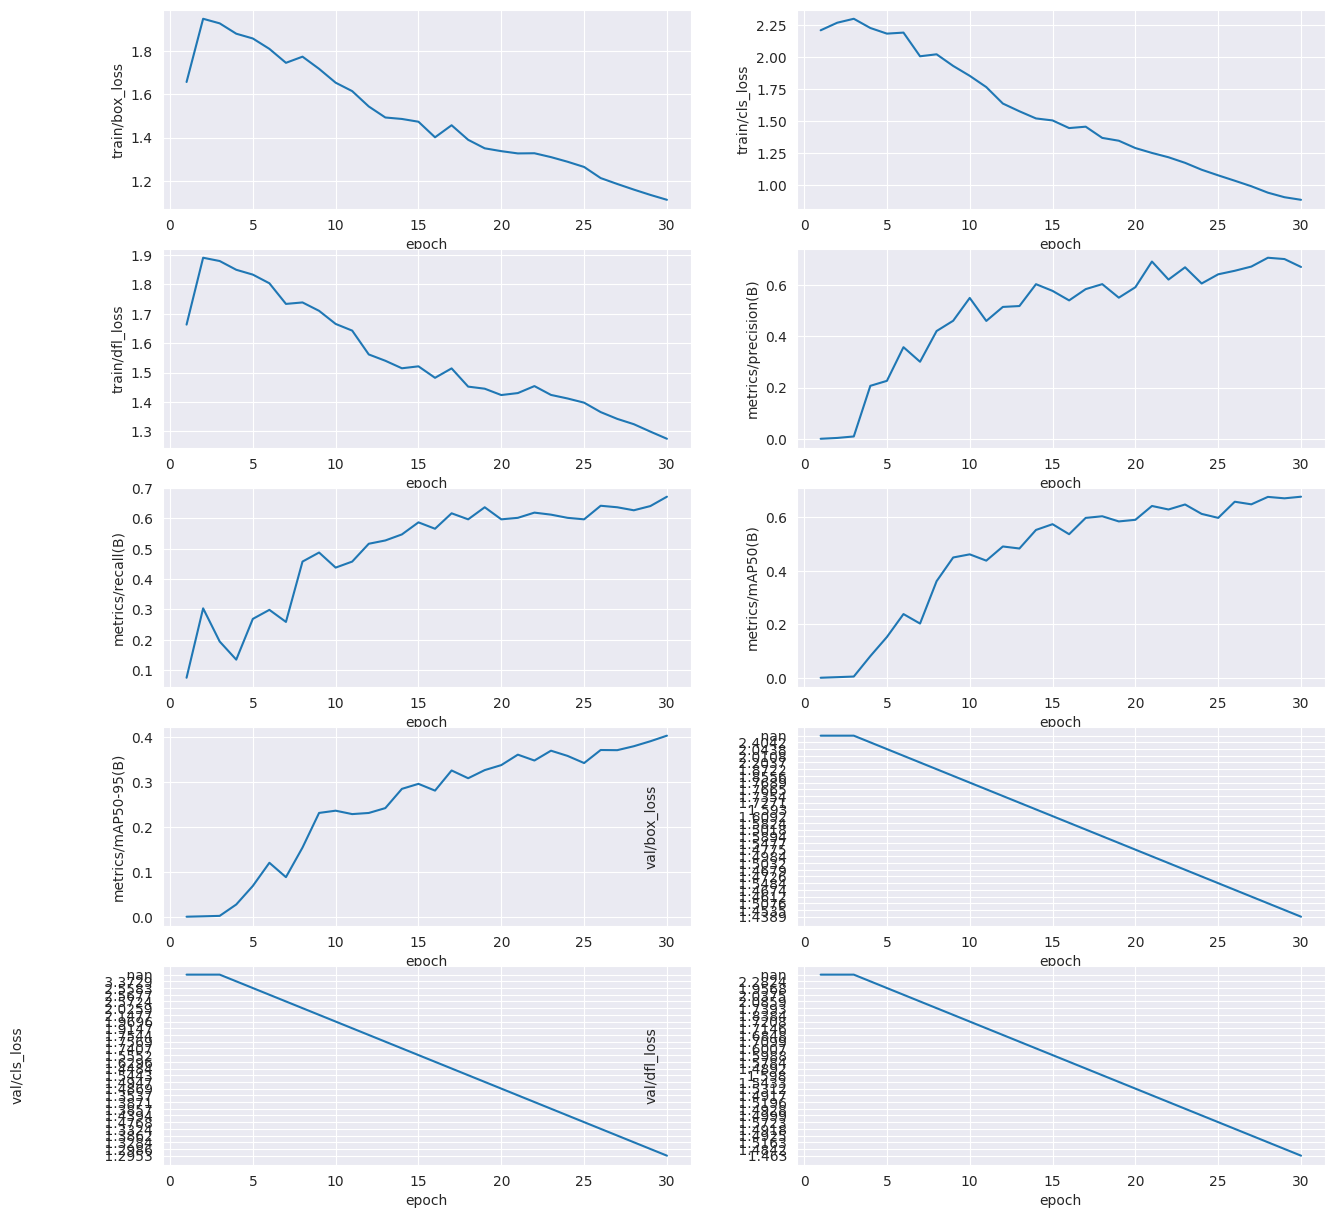

In [ ]:
%matplotlib inline
# read in the results.csv file as a pandas dataframe
df = pd.read_csv('/content/runs/detect/train/results.csv')
df.columns = df.columns.str.strip()

# create subplots using seaborn
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(15, 15))

# plot the columns using seaborn
sns.lineplot(x='epoch', y='train/box_loss', data=df, ax=axs[0,0])
sns.lineplot(x='epoch', y='train/cls_loss', data=df, ax=axs[0,1])
sns.lineplot(x='epoch', y='train/dfl_loss', data=df, ax=axs[1,0])
sns.lineplot(x='epoch', y='metrics/precision(B)', data=df, ax=axs[1,1])
sns.lineplot(x='epoch', y='metrics/recall(B)', data=df, ax=axs[2,0])
sns.lineplot(x='epoch', y='metrics/mAP50(B)', data=df, ax=axs[2,1])
sns.lineplot(x='epoch', y='metrics/mAP50-95(B)', data=df, ax=axs[3,0])
sns.lineplot(x='epoch', y='val/box_loss', data=df, ax=axs[3,1])
sns.lineplot(x='epoch', y='val/cls_loss', data=df, ax=axs[4,0])
sns.lineplot(x='epoch', y='val/dfl_loss', data=df, ax=axs[4,1])

In [ ]:
# set titles and axis labels for each subplot
axs[0,0].set(title='Train Box Loss')
axs[0,1].set(title='Train Class Loss')
axs[1,0].set(title='Train DFL Loss')
axs[1,1].set(title='Metrics Precision (B)')
axs[2,0].set(title='Metrics Recall (B)')
axs[2,1].set(title='Metrics mAP50 (B)')
axs[3,0].set(title='Metrics mAP50-95 (B)')
axs[3,1].set(title='Validation Box Loss')
axs[4,0].set(title='Validation Class Loss')
axs[4,1].set(title='Validation DFL Loss')

# add suptitle and subheader
plt.suptitle('Training Metrics and Loss', fontsize=24)

# adjust top margin to make space for suptitle
plt.subplots_adjust(top=0.8)

# adjust spacing between subplots
plt.tight_layout()

plt.show()

<Figure size 640x480 with 0 Axes>

In [ ]:
%matplotlib inline
# Loading the best performing model
model = YOLO('/content/runs/detect/train/weights/best.pt')

# Evaluating the model on the test dataset
metrics = model.val(conf = 0.25, split = 'val')

Ultralytics YOLOv8.2.87 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 68,124,531 parameters, 0 gradients, 257.4 GFLOPs


val: Scanning /content/Pothole_Segmentation_YOLOv8/valid/labels.cache... 60 images, 0 backgrounds, 0 corrupt: 100%|██████████| 60/60 [00:00<?, ?it/s]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:04<00:00,  1.23s/it]


                   all         60        201       0.67      0.672      0.682      0.437
Speed: 0.3ms preprocess, 47.1ms inference, 0.0ms loss, 6.2ms postprocess per image
Results saved to runs/detect/val5


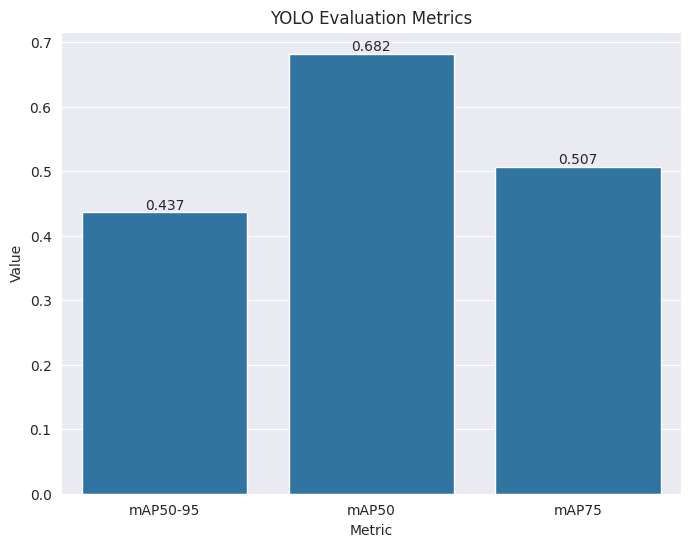

In [ ]:
%matplotlib inline
# Create the barplot
ax = sns.barplot(x=['mAP50-95', 'mAP50', 'mAP75'], y=[metrics.box.map, metrics.box.map50, metrics.box.map75])

# Set the title and axis labels
ax.set_title('YOLO Evaluation Metrics')
ax.set_xlabel('Metric')
ax.set_ylabel('Value')

# Set the figure size
fig = plt.gcf()
fig.set_size_inches(8, 6)

# Add the values on top of the bars
for p in ax.patches:
    ax.annotate('{:.3f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

# Show the plot
plt.show()

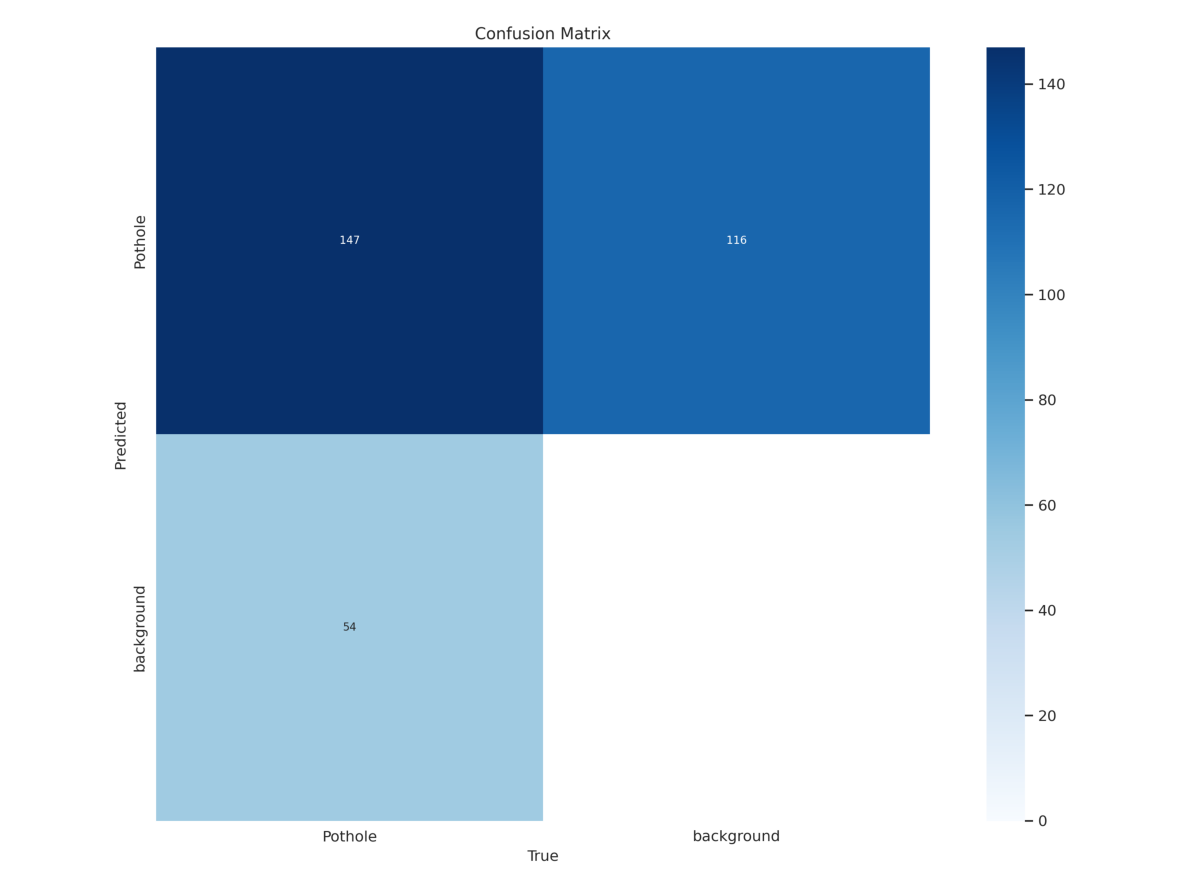

In [ ]:
%matplotlib inline
# Reading the confusion matrix image file
img = mpimg.imread('/content/runs/detect/train/confusion_matrix.png')

# Plotting the confusion matrix image
fig, ax = plt.subplots(figsize = (15, 15))


ax.imshow(img)
ax.axis('off');

In [ ]:
def pothole_detect(img_path):

    # Read the image
    img = cv2.imread(img_path)

    # Pass the image through the detection model and get the result
    detect_result = model(img)

    # Plot the detections
    detect_img = detect_result[0].plot()

    # Convert the image to RGB format
    detect_img = cv2.cvtColor(detect_img, cv2.COLOR_BGR2RGB)

    return detect_img

# Model Testing

## 1. Testing the model with the validation set


0: 512x512 1 Pothole, 59.7ms
Speed: 2.7ms preprocess, 59.7ms inference, 1.8ms postprocess per image at shape (1, 3, 512, 512)

0: 512x512 3 Potholes, 56.0ms
Speed: 2.7ms preprocess, 56.0ms inference, 1.5ms postprocess per image at shape (1, 3, 512, 512)

0: 512x512 2 Potholes, 54.2ms
Speed: 2.6ms preprocess, 54.2ms inference, 1.7ms postprocess per image at shape (1, 3, 512, 512)

0: 512x512 15 Potholes, 54.2ms
Speed: 3.7ms preprocess, 54.2ms inference, 1.6ms postprocess per image at shape (1, 3, 512, 512)

0: 512x512 8 Potholes, 37.2ms
Speed: 3.8ms preprocess, 37.2ms inference, 2.3ms postprocess per image at shape (1, 3, 512, 512)

0: 512x512 1 Pothole, 34.1ms
Speed: 3.8ms preprocess, 34.1ms inference, 2.2ms postprocess per image at shape (1, 3, 512, 512)

0: 512x512 1 Pothole, 33.2ms
Speed: 3.0ms preprocess, 33.2ms inference, 1.6ms postprocess per image at shape (1, 3, 512, 512)

0: 512x512 2 Potholes, 33.3ms
Speed: 2.7ms preprocess, 33.3ms inference, 1.6ms postprocess per image at s

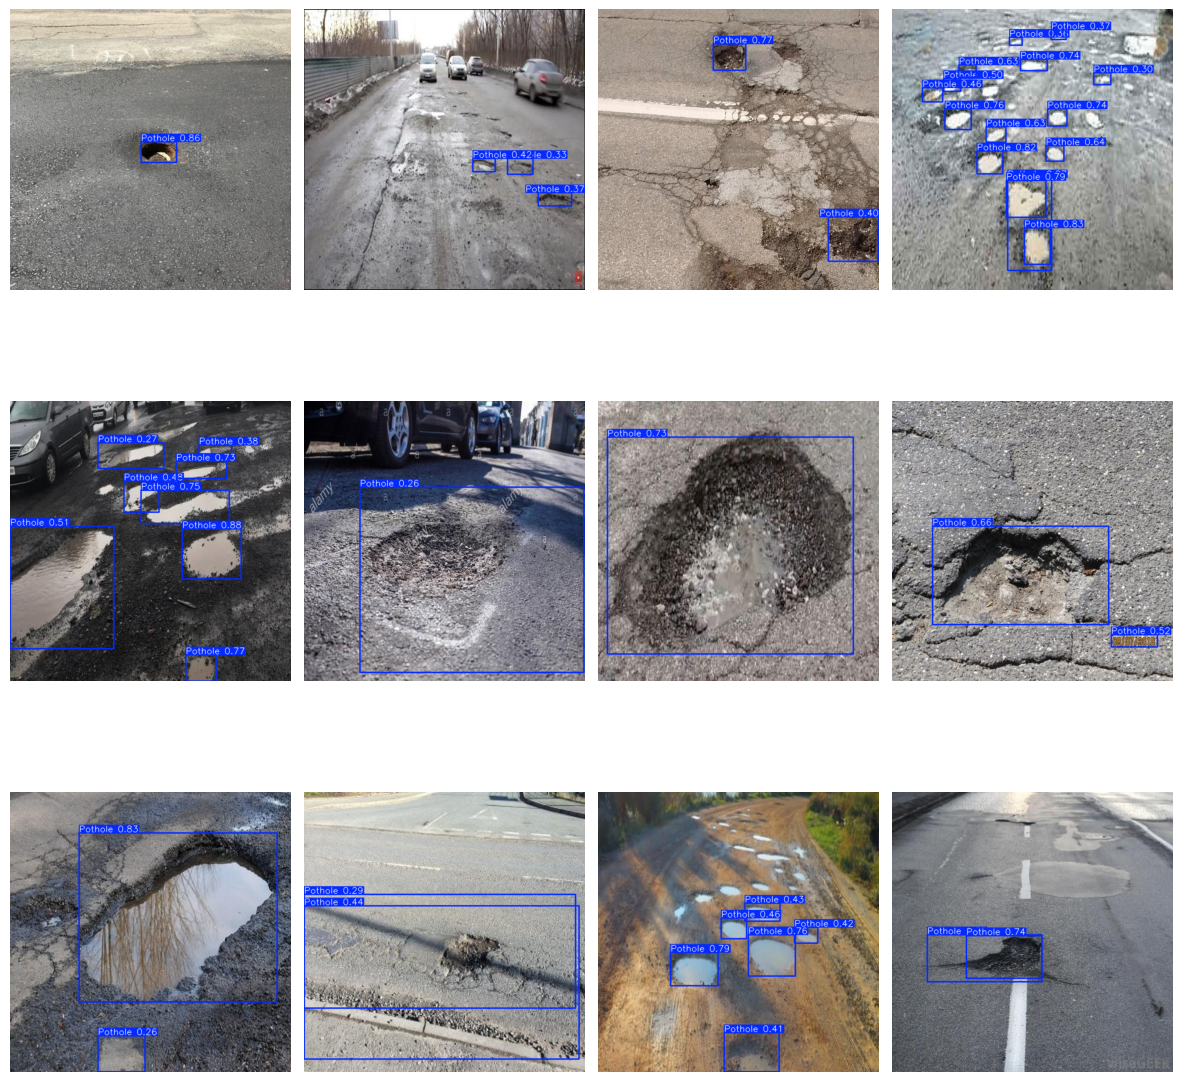

In [ ]:
import random

# Define the directory where the custom images are stored
custom_image_dir = '/content/Pothole_Segmentation_YOLOv8/valid/images'

# Get the list of image files in the directory
image_files = os.listdir(custom_image_dir)

# Select 16 random images from the list
selected_images = random.sample(image_files, 12)

# Create a figure with subplots for each image
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 15))

# Iterate over the selected images and plot each one
for i, img_file in enumerate(selected_images):

    # Compute the row and column index of the current subplot
    row_idx = i // 4
    col_idx = i % 4

    # Load the current image and run object detection
    img_path = os.path.join(custom_image_dir, img_file)
    detect_img = pothole_detect(img_path)

     # Plot the current image on the appropriate subplot
    axes[row_idx, col_idx].imshow(detect_img)
    axes[row_idx, col_idx].axis('off')

# Adjust the spacing between the subplots
plt.subplots_adjust(wspace=0.05, hspace=0.05)


## 2. Testing the model with an external image




image 1/1 /content/download.jpeg: 352x512 1 Pothole, 48.4ms
Speed: 1.4ms preprocess, 48.4ms inference, 1.7ms postprocess per image at shape (1, 3, 352, 512)


array([[[152, 146, 139],
        [161, 155, 148],
        [145, 141, 136],
        ...,
        [ 71,  75,  76],
        [ 82,  87,  88],
        [ 82,  88,  87]],

       [[115, 109, 104],
        [122, 118, 113],
        [118, 114, 109],
        ...,
        [ 80,  82,  83],
        [ 75,  77,  77],
        [ 73,  78,  76]],

       [[ 45,  40,  37],
        [ 47,  44,  40],
        [ 41,  38,  34],
        ...,
        [ 86,  84,  83],
        [ 83,  81,  80],
        [ 83,  82,  78]],

       ...,

       [[ 81,  85,  86],
        [ 81,  85,  86],
        [ 68,  71,  75],
        ...,
        [ 98, 102, 103],
        [ 63,  66,  70],
        [ 68,  71,  75]],

       [[ 54,  56,  57],
        [ 42,  44,  45],
        [ 38,  39,  43],
        ...,
        [ 91,  95,  96],
        [ 72,  75,  79],
        [ 70,  73,  77]],

       [[ 62,  64,  65],
        [ 73,  75,  76],
        [ 85,  86,  90],
        ...,
        [ 89,  93,  94],
        [ 87,  90,  94],
        [ 76,  79,  83]]], dtype=uint8)
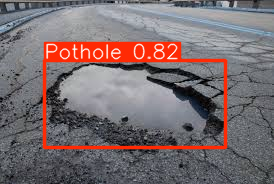

In [ ]:
# Path to your external photo
external_photo_path = '/content/download.jpeg'
#external_photo_path = '/content/download (1).jpeg'
#external_photo_path = '/content/download(2).jpeg'

# Load and predict
results = model(external_photo_path)

# Visualize results
results[0].plot()


## 3. Test the model with video



In [ ]:
from collections import deque

# Define the video path
video_path = '/content/Pothole_Segmentation_YOLOv8/sample_video.mp4'

# Define font, scale, colors, and position for the annotation
font = cv2.FONT_HERSHEY_SIMPLEX
font_scale = 1
text_position = (40, 80)
font_color = (255, 255, 255)    # White color for text
background_color = (0, 0, 255)  # Red background for text

# Initialize a deque with fixed length for averaging the last 10 percentage damages
damage_deque = deque(maxlen=10)

# Open the video
cap = cv2.VideoCapture(video_path)

# Define the codec and create VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'MP4V')
out = cv2.VideoWriter('road_damage_assessment.mp4', fourcc, 20.0, (int(cap.get(3)), int(cap.get(4))))

# Load the YOLO model
# Replace 'path/to/your/best.pt' with the actual path to your trained model weights
best_model = YOLO('/content/runs/detect/train/weights/best.pt') # Load the model with the best weights

# Read until video is completed
while cap.isOpened():
     # Capture frame-by-frame
    ret, frame = cap.read()
    if ret:
        # Perform inference on the frame
        results = best_model.predict(source=frame, imgsz=640, conf=0.25)
        processed_frame = results[0].plot(boxes=False)

        # Initializes percentage_damage to 0
        percentage_damage = 0

        # If masks are available, calculate total damage area and percentage
        if results[0].masks is not None:
            total_area = 0
            masks = results[0].masks.data.cpu().numpy()
            image_area = frame.shape[0] * frame.shape[1]  # total number of pixels in the image
            for mask in masks:
                binary_mask = (mask > 0).astype(np.uint8) * 255
                contour, _ = cv2.findContours(binary_mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
                total_area += cv2.contourArea(contour[0])

            percentage_damage = (total_area / image_area) * 100

        # Calculate and update the percentage damage
        damage_deque.append(percentage_damage)
        smoothed_percentage_damage = sum(damage_deque) / len(damage_deque)

        # Draw a thick line for text background
        cv2.line(processed_frame, (text_position[0], text_position[1] - 10),
                 (text_position[0] + 350, text_position[1] - 10), background_color, 40)

        # Annotate the frame with the percentage of damage
        cv2.putText(processed_frame, f'Road Damage: {smoothed_percentage_damage:.2f}%', text_position, font, font_scale, font_color, 2, cv2.LINE_AA)

        # Write the processed frame to the output video
        out.write(processed_frame)

        # Uncomment the following 3 lines if running this code on a local machine to view the real-time processing results
        # cv2.imshow('Road Damage Assessment', processed_frame) # Display the processed frame
        # if cv2.waitKey(1) & 0xFF == ord('q'): # Press Q on keyboard to exit the loop
        #     break
    else:
        break

# Release the video capture and video write objects
cap.release()
out.release()

# Close all the frames
# cv2.destroyAllWindows()


0: 384x640 6 Potholes, 64.1ms
Speed: 2.0ms preprocess, 64.1ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 8 Potholes, 62.9ms
Speed: 2.8ms preprocess, 62.9ms inference, 8.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 6 Potholes, 36.7ms
Speed: 3.0ms preprocess, 36.7ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 5 Potholes, 36.6ms
Speed: 2.6ms preprocess, 36.6ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 5 Potholes, 35.8ms
Speed: 2.6ms preprocess, 35.8ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 5 Potholes, 31.9ms
Speed: 2.7ms preprocess, 31.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 6 Potholes, 30.3ms
Speed: 2.7ms preprocess, 30.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 6 Potholes, 30.8ms
Speed: 3.0ms preprocess, 30.8ms inference, 1.5ms postprocess per image at